# 1. Import Params

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt
import src.util as util
from imblearn.under_sampling import RandomUnderSampler

In [2]:
params = util.load_config()
params

{'raw_dataset_dir': 'data/raw/',
 'train_set_path': ['data/processed/x_train.pkl',
  'data/processed/y_train.pkl'],
 'valid_set_path': ['data/processed/x_valid.pkl',
  'data/processed/y_valid.pkl'],
 'test_set_path': ['data/processed/x_test.pkl', 'data/processed/y_test.pkl'],
 'train_feng_set_path': ['data/processed/x_train_feng.pkl',
  'data/processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['data/processed/x_valid_feng.pkl',
  'data/processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['data/processed/x_test_feng.pkl',
  'data/processed/y_test_feng.pkl'],
 'raw_dataset_path': 'data/processed/raw_dataset.pkl',
 'cleaned_raw_dataset_path': 'data/processed/raw_dataset.pkl',
 'production_model_path': 'models/production_model.pkl',
 'ohe_job_path': 'models/ohe_job.pkl',
 'ohe_marital_path': 'models/ohe_marital.pkl',
 'ohe_education_path': 'models/ohe_education.pkl',
 'ohe_default_path': 'models/ohe_default.pkl',
 'ohe_housing_path': 'models/ohe_housing.pkl',
 'ohe_loan_path': 'models/

# 2. Load Train Data

In [3]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [4]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
27506,57,admin.,married,high.school,no,yes,no,cellular,nov,fri,41,2,-1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
20991,44,blue-collar,married,basic.6y,unknown,no,no,cellular,aug,thu,145,1,-1,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
34380,31,blue-collar,single,high.school,no,no,no,cellular,may,thu,451,1,-1,1,failure,-1.8,92.893,-46.2,1.266,5099.1
17259,53,retired,married,professional.course,no,no,no,cellular,jul,fri,124,2,-1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
15329,31,self-employed,single,university.degree,no,yes,no,cellular,jul,fri,85,2,-1,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,32,management,married,university.degree,no,yes,no,telephone,may,thu,619,1,-1,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
8970,33,admin.,married,university.degree,no,unknown,unknown,telephone,jun,thu,49,1,-1,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
33752,30,entrepreneur,married,university.degree,no,no,no,cellular,may,wed,585,1,-1,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1
18503,34,technician,married,professional.course,unknown,no,no,cellular,jul,thu,61,1,-1,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1


In [5]:
y_train

27506     no
20991     no
34380     no
17259     no
15329     no
        ... 
6971      no
8970      no
33752    yes
18503     no
24790     no
Name: y, Length: 28823, dtype: object

In [8]:
y_train_encoded = y_train.map({'yes': 1, 'no': 0})
y_train_encoded

27506    0
20991    0
34380    0
17259    0
15329    0
        ..
6971     0
8970     0
33752    1
18503    0
24790    0
Name: y, Length: 28823, dtype: int64

In [9]:
#gabungkan x dan y train
dataset = pd.concat([x_train, y_train_encoded], axis = 1)

In [10]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27506,57,admin.,married,high.school,no,yes,no,cellular,nov,fri,...,2,-1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
20991,44,blue-collar,married,basic.6y,unknown,no,no,cellular,aug,thu,...,1,-1,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
34380,31,blue-collar,single,high.school,no,no,no,cellular,may,thu,...,1,-1,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
17259,53,retired,married,professional.course,no,no,no,cellular,jul,fri,...,2,-1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
15329,31,self-employed,single,university.degree,no,yes,no,cellular,jul,fri,...,2,-1,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,32,management,married,university.degree,no,yes,no,telephone,may,thu,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
8970,33,admin.,married,university.degree,no,unknown,unknown,telephone,jun,thu,...,1,-1,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
33752,30,entrepreneur,married,university.degree,no,no,no,cellular,may,wed,...,1,-1,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,1
18503,34,technician,married,professional.course,unknown,no,no,cellular,jul,thu,...,1,-1,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0


# 3. EDA

## 3.1 Cek Missing Values

In [11]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## 3.2 Cek Jumlah Masing-masing Label

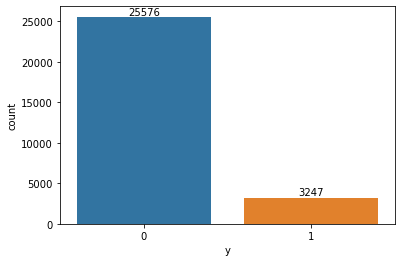

In [25]:
ax = sns.countplot(data = dataset, x = "y", label = dataset["y"].unique())
ax.bar_label(ax.containers[0])
plt.show()

In [29]:
x, y = RandomUnderSampler(random_state = 42).fit_resample(x_train, y_train_encoded)
train_set_bal = pd.concat([x, y], axis = 1)
train_set_bal

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,-1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,52,retired,married,university.degree,no,yes,no,telephone,nov,thu,...,2,-1,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
2,30,services,married,high.school,unknown,no,no,telephone,may,fri,...,2,-1,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,0
3,49,housemaid,single,high.school,unknown,yes,yes,telephone,may,mon,...,2,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,30,blue-collar,married,basic.9y,no,yes,no,telephone,may,fri,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,25,services,divorced,high.school,no,yes,yes,cellular,jun,thu,...,2,-1,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,1
6490,32,admin.,married,university.degree,no,yes,no,cellular,jun,tue,...,1,3,2,failure,-2.9,92.963,-40.8,1.262,5076.2,1
6491,48,blue-collar,married,basic.6y,unknown,yes,no,cellular,jul,wed,...,2,-1,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,1
6492,61,retired,married,high.school,no,yes,no,cellular,sep,wed,...,1,3,1,success,-3.4,92.379,-29.8,0.753,5017.5,1


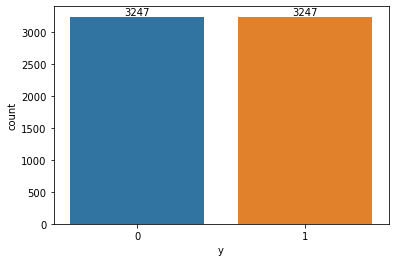

In [31]:
ax = sns.countplot(data = train_set_bal, x = "y", label = dataset["y"].unique())
ax.bar_label(ax.containers[0])
plt.show()

## 3.3. Cek Informasi Statistik

### 3.3.1. Cek Skewness

In [12]:
dataset.skew(numeric_only = True)

age               0.783457
duration          3.162677
campaign          4.890643
pdays             7.297217
previous          3.844635
emp.var.rate     -0.723002
cons.price.idx   -0.231424
cons.conf.idx     0.303789
euribor3m        -0.707019
nr.employed      -1.045242
y                 2.450386
dtype: float64

### 3.3.2. Pemisahan Dataset berdasarkan Kelas

In [18]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_yes = dataset[dataset['y'] == 1].copy()
dataset_no = dataset[dataset['y'] != 1].copy()

In [16]:
dataset_yes.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.0
mean,40.960887,554.199569,2.056052,0.474284,0.496766,-1.201140,93.365711,-39.796674,2.153141,5095.999569,1.0
std,13.768552,401.248410,1.615334,3.319670,0.872267,1.628817,0.675648,6.093385,1.755745,88.366216,0.0
min,17.000000,63.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.0
25%,31.000000,254.500000,1.000000,-1.000000,0.000000,-1.800000,92.893000,-46.200000,0.854000,5017.500000,1.0
50%,37.000000,458.000000,2.000000,-1.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000,1.0
75%,50.000000,744.000000,2.000000,-1.000000,1.000000,-0.100000,93.918000,-36.100000,4.855000,5191.000000,1.0
max,98.000000,4199.000000,17.000000,27.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.0


In [19]:
dataset_no.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.000000,25576.0
mean,39.873827,220.388411,2.623905,-0.888997,0.133211,0.244991,93.602534,-40.586530,3.805524,5175.928656,0.0
std,9.903874,204.067551,2.859522,1.031202,0.410762,1.486278,0.560148,4.399946,1.642189,64.880237,0.0
min,17.000000,0.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.0
25%,32.000000,95.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000,0.0
50%,38.000000,164.000000,2.000000,-1.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000,0.0
75%,47.000000,278.000000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.0
max,94.000000,3509.000000,56.000000,22.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.0


### 3.3.3. Visualisasi Fitur Age

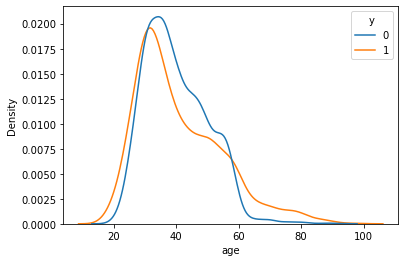

In [38]:
sns.kdeplot(data = train_set_bal, x = "age", hue = "y")
plt.show()

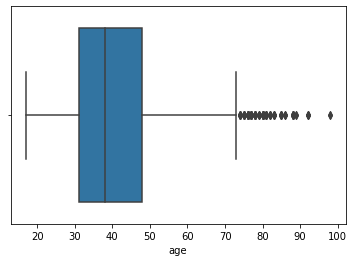

In [55]:
sns.boxplot(data = train_set_bal, x = "age")
plt.show()

### 3.2.3. Visualisasi Fitur Duration

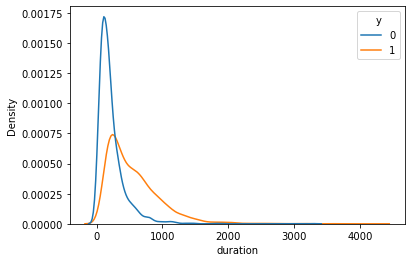

In [40]:
sns.kdeplot(data = train_set_bal, x = "duration", hue = "y")
plt.show()

<AxesSubplot:xlabel='duration'>

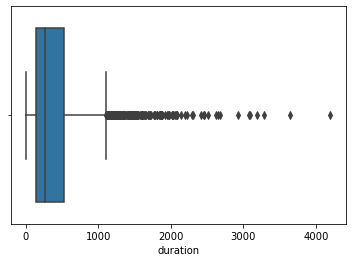

In [56]:
sns.boxplot(data = train_set_bal, x = "duration")

## 3.2.4 Visualisasi Fitur campaign

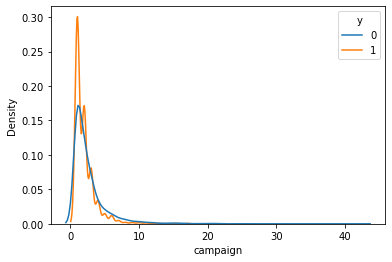

In [41]:
sns.kdeplot(data = train_set_bal, x = "campaign", hue = "y")
plt.show()

<AxesSubplot:xlabel='campaign'>

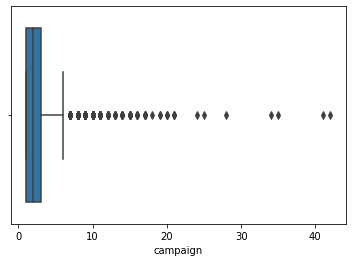

In [57]:
sns.boxplot(data = train_set_bal, x = "campaign")

## 3.2.4 Visualisasi Fitur previous

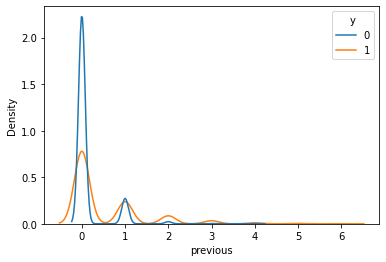

In [44]:
sns.kdeplot(data = train_set_bal, x = "previous", hue = "y")
plt.show()

<AxesSubplot:xlabel='previous'>

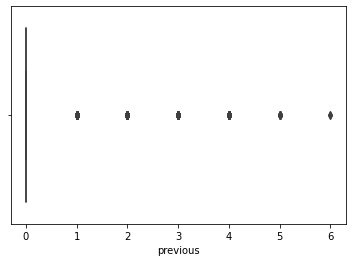

In [58]:
sns.boxplot(data = train_set_bal, x = "previous")

## 3.2.5 Visualisasi Fitur pdays

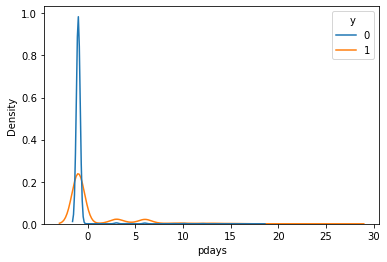

In [45]:
sns.kdeplot(data = train_set_bal, x = "pdays", hue = "y")
plt.show()

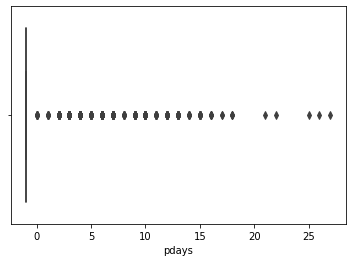

In [60]:
sns.boxplot(data = train_set_bal, x = "pdays")
plt.show()

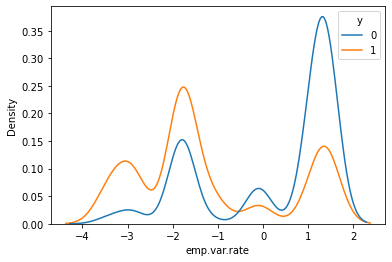

In [46]:
sns.kdeplot(data = train_set_bal, x = "emp.var.rate", hue = "y")
plt.show()

<AxesSubplot:xlabel='emp.var.rate'>

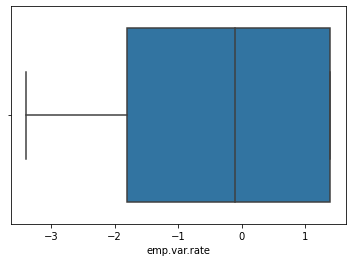

In [61]:
sns.boxplot(data = train_set_bal, x = "emp.var.rate")

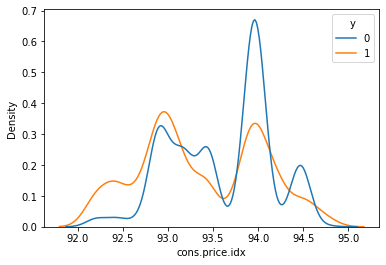

In [49]:
sns.kdeplot(data = train_set_bal, x = "cons.price.idx", hue = "y")
plt.show()

<AxesSubplot:xlabel='cons.price.idx'>

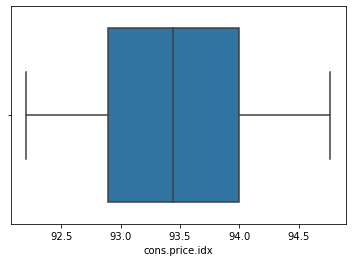

In [62]:
sns.boxplot(data = train_set_bal, x = "cons.price.idx")

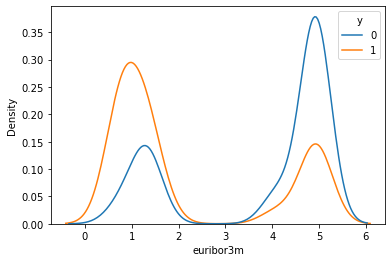

In [50]:
sns.kdeplot(data = train_set_bal, x = "euribor3m", hue = "y")
plt.show()

<AxesSubplot:xlabel='euribor3m'>

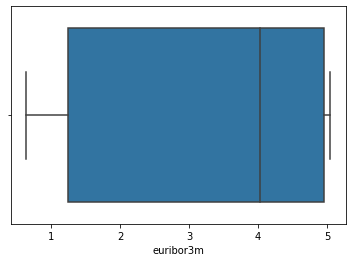

In [63]:
sns.boxplot(data = train_set_bal, x = "euribor3m")

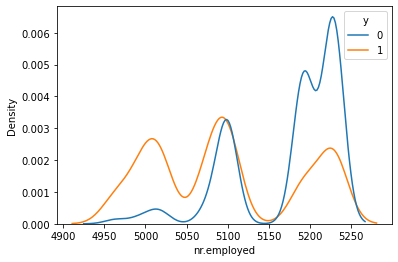

In [53]:
sns.kdeplot(data = train_set_bal, x = "nr.employed", hue = "y")
plt.show()

<AxesSubplot:xlabel='nr.employed'>

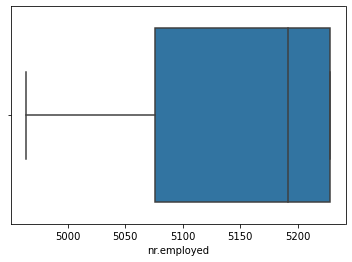

In [64]:
sns.boxplot(data = train_set_bal, x = "nr.employed")

# Cek Korelasi Variable Numerik

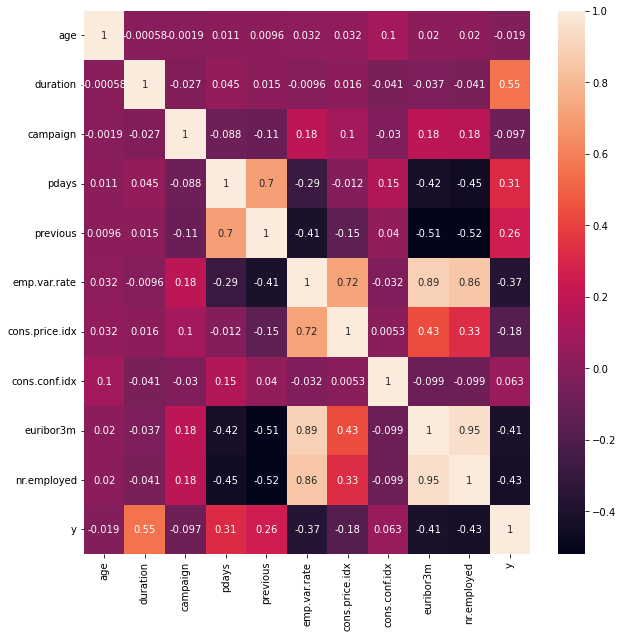

In [70]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set_bal.corr(method = "spearman"), annot = True, ax = ax)
plt.show()

## Cek T-Test untuk masing-masing variable numerik

In [99]:
scs.ttest_ind(
    train_set_bal[train_set_bal['y'] == 1]['age'],
    train_set_bal[train_set_bal['y'] == 0]['age']
)

Ttest_indResult(statistic=2.9747236819865943, pvalue=0.0029433208060747427)

In [114]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(train_set_bal) - 2))

-1.6450883755548171

In [108]:
scs.ttest_ind(
    train_set_bal[train_set_bal['y'] == 1]['duration'],
    train_set_bal[train_set_bal['y'] == 0]['duration']
)

Ttest_indResult(statistic=41.85471792590191, pvalue=0.0)

In [109]:
scs.ttest_ind(
    train_set_bal[train_set_bal['y'] == 1]['campaign'],
    train_set_bal[train_set_bal['y'] == 0]['campaign']
)

Ttest_indResult(statistic=-10.174155918278911, pvalue=3.921216951626728e-24)

In [110]:
scs.ttest_ind(
    train_set_bal[train_set_bal['y'] == 1]['pdays'],
    train_set_bal[train_set_bal['y'] == 0]['pdays']
)

Ttest_indResult(statistic=22.45509764006986, pvalue=1.310868085357526e-107)

In [111]:
scs.ttest_ind(
    train_set_bal[train_set_bal['y'] == 1]['cons.price.idx'],
    train_set_bal[train_set_bal['y'] == 0]['cons.price.idx']
)

Ttest_indResult(statistic=-15.212452681989639, pvalue=2.2308245450589686e-51)

In [112]:
scs.ttest_ind(
    train_set_bal[train_set_bal['y'] == 1]['euribor3m'],
    train_set_bal[train_set_bal['y'] == 0]['euribor3m']
)

Ttest_indResult(statistic=-38.83961935136416, pvalue=6.566753130955616e-297)

In [113]:
scs.ttest_ind(
    train_set_bal[train_set_bal['y'] == 1]['nr.employed'],
    train_set_bal[train_set_bal['y'] == 0]['nr.employed']
)

Ttest_indResult(statistic=-41.19041574162689, pvalue=0.0)